In [1]:
from helper.neural_net import *
from helper.autoencoder_helper import extract_features_encoder
from models.autoencoder import Encoder, Decoder
import matplotlib.pyplot as plt
from helper.loading import *
from helper.metrics import *
from helper.image import get_imgs_gt_patches
from helper.visualisations import *
from models.features_extraction import *
from helper.const import *
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

%load_ext autoreload
%autoreload 2

In [9]:
ds = OriginalTrainingRoadPatches(image_dir)
dataset_train = torch.utils.data.DataLoader(ds,
                                            batch_size=1,
                                            shuffle=True
                                            )

encoder = Encoder()
decoder = Decoder()

for batch_x, batch_y in dataset_train:
    x = encoder(batch_x)
    y = decoder(x)

    break

torch.Size([1, 8192])
torch.Size([1, 512, 4, 4])
torch.Size([1, 3, 16, 16])


In [2]:
# Train the autoencoder and save the weights
train_losses, test_losses = run_experiment('autoencoder', 'mse', 'adam', image_dir, test_dir, num_epochs=100,
               learning_rate=1e-4, autoencoder=True, lr_scheduler=True, lr_schedule=(80, 0.1), batch_size=250)

Starting training


100%|██████████| 250/250 [01:39<00:00,  2.52it/s]


Epoch 0 | Avg test loss: 0.01996


100%|██████████| 250/250 [01:16<00:00,  3.28it/s]


Epoch 1 | Avg test loss: 0.01527


100%|██████████| 250/250 [01:15<00:00,  3.30it/s]


Epoch 2 | Avg test loss: 0.01353


100%|██████████| 250/250 [01:16<00:00,  3.29it/s]


Epoch 3 | Avg test loss: 0.01302


100%|██████████| 250/250 [01:14<00:00,  3.37it/s]


Epoch 4 | Avg test loss: 0.01145


100%|██████████| 250/250 [01:14<00:00,  3.37it/s]


Epoch 5 | Avg test loss: 0.01081


100%|██████████| 250/250 [01:14<00:00,  3.36it/s]


Epoch 6 | Avg test loss: 0.01034


100%|██████████| 250/250 [01:14<00:00,  3.36it/s]


Epoch 7 | Avg test loss: 0.00985


100%|██████████| 250/250 [01:14<00:00,  3.35it/s]


Epoch 8 | Avg test loss: 0.00926


100%|██████████| 250/250 [01:14<00:00,  3.35it/s]


Epoch 9 | Avg test loss: 0.00882


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 10 | Avg test loss: 0.00849


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 11 | Avg test loss: 0.00816


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 12 | Avg test loss: 0.00791


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 13 | Avg test loss: 0.00766


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 14 | Avg test loss: 0.00730


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 15 | Avg test loss: 0.00700


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 16 | Avg test loss: 0.00770


100%|██████████| 250/250 [01:15<00:00,  3.33it/s]


Epoch 17 | Avg test loss: 0.00671


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 18 | Avg test loss: 0.00639


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 19 | Avg test loss: 0.00616


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 20 | Avg test loss: 0.00607


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 21 | Avg test loss: 0.00605


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 22 | Avg test loss: 0.00602


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 23 | Avg test loss: 0.00598


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 24 | Avg test loss: 0.00597


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 25 | Avg test loss: 0.00594


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 26 | Avg test loss: 0.00594


100%|██████████| 250/250 [01:15<00:00,  3.30it/s]


Epoch 27 | Avg test loss: 0.00589


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 28 | Avg test loss: 0.00587


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 29 | Avg test loss: 0.00584


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 30 | Avg test loss: 0.00582


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 31 | Avg test loss: 0.00580


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 32 | Avg test loss: 0.00576


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 33 | Avg test loss: 0.00577


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 34 | Avg test loss: 0.00572


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 35 | Avg test loss: 0.00570


100%|██████████| 250/250 [01:15<00:00,  3.30it/s]


Epoch 36 | Avg test loss: 0.00570


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 37 | Avg test loss: 0.00566


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 38 | Avg test loss: 0.00563


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 39 | Avg test loss: 0.00565


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 40 | Avg test loss: 0.00560


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 41 | Avg test loss: 0.00560


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 42 | Avg test loss: 0.00559


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 43 | Avg test loss: 0.00559


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 44 | Avg test loss: 0.00559


100%|██████████| 250/250 [01:15<00:00,  3.33it/s]


Epoch 45 | Avg test loss: 0.00558


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 46 | Avg test loss: 0.00558


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 47 | Avg test loss: 0.00558


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 48 | Avg test loss: 0.00557


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 49 | Avg test loss: 0.00557


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 50 | Avg test loss: 0.00558


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 51 | Avg test loss: 0.00557


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 52 | Avg test loss: 0.00557


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 53 | Avg test loss: 0.00556


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 54 | Avg test loss: 0.00556


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 55 | Avg test loss: 0.00554


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 56 | Avg test loss: 0.00554


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 57 | Avg test loss: 0.00554


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 58 | Avg test loss: 0.00554


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 59 | Avg test loss: 0.00553


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 60 | Avg test loss: 0.00553


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 61 | Avg test loss: 0.00553


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 62 | Avg test loss: 0.00553


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 63 | Avg test loss: 0.00553


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 64 | Avg test loss: 0.00553


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 65 | Avg test loss: 0.00553


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 66 | Avg test loss: 0.00553


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 67 | Avg test loss: 0.00553


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 68 | Avg test loss: 0.00553


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 69 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 70 | Avg test loss: 0.00553


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 71 | Avg test loss: 0.00553


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 72 | Avg test loss: 0.00553


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 73 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 74 | Avg test loss: 0.00553


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 75 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 76 | Avg test loss: 0.00553


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 77 | Avg test loss: 0.00553


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 78 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 79 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 80 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 81 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 82 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 83 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 84 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 85 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 86 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 87 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 88 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 89 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 90 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 91 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 92 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 93 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 94 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 95 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 96 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 97 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:14<00:00,  3.34it/s]


Epoch 98 | Avg test loss: 0.00552


100%|██████████| 250/250 [01:15<00:00,  3.29it/s]


Epoch 99 | Avg test loss: 0.00552
End of training


In [2]:
sum(p.numel() for p in AutoEncoder().parameters() if p.requires_grad)

10245635

In [10]:
len(train_losses)

62500

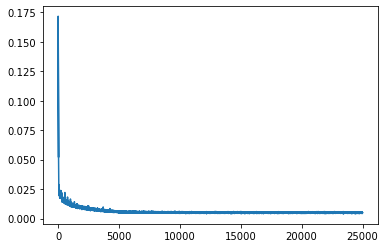

In [3]:
plt.plot(train_losses)
plt.show()

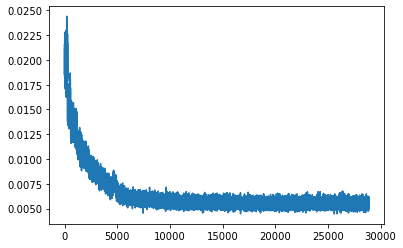

In [4]:
plt.plot(test_losses)
plt.show()

## Compare the true and reconstructed images

In [5]:
encoder_path = 'encoder_2021-12-11_11-58-52'
decoder_path = 'decoder_2021-12-11_11-58-52'

encoder = Encoder()
load_model_weights(encoder, weights_folder + "autoencoder/" + encoder_path + ".pth")

decoder = Decoder()
load_model_weights(decoder, weights_folder + "autoencoder/" + decoder_path + ".pth")

autoencoder = AutoEncoder(encoder, decoder)
autoencoder.eval()

AutoEncoder(
  (encoder): Encoder(
    (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (conv4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (conv6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
    (conv7): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
    (fc): Linear(in_features=8192, out_features=64, bias=True)
  )
  (decoder): Decoder(
    (fc): Linear(in_features=64, out_features=8192, bias=True)
    (deconv1): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(1, 1))
    (deconv2): ConvTranspose2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (deconv3): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(1, 1))
    (deconv4): ConvTranspose2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (deconv5): ConvTranspose2d(128, 64, ke

In [6]:
imgs = load_all_images_in_folder(image_dir)
patches = get_img_patches(imgs)

array([[[0.1254902 , 0.12941177, 0.11764706],
        [0.12941177, 0.12941177, 0.11764706],
        [0.09803922, 0.09411765, 0.09019608],
        ...,
        [0.47653815, 0.4710972 , 0.42181578],
        [0.5182489 , 0.510782  , 0.45524952],
        [0.50199527, 0.48863193, 0.45273927]],

       [[0.10980392, 0.11372549, 0.10588235],
        [0.12941177, 0.13333334, 0.11764706],
        [0.10588235, 0.10196079, 0.09411765],
        ...,
        [0.42803437, 0.42603073, 0.3711558 ],
        [0.50699323, 0.49693587, 0.44681653],
        [0.4961476 , 0.48171398, 0.4394709 ]],

       [[0.08627451, 0.09019608, 0.09019608],
        [0.11372549, 0.10980392, 0.10196079],
        [0.10588235, 0.10980392, 0.09411765],
        ...,
        [0.2558323 , 0.26583767, 0.23766032],
        [0.39211148, 0.37401032, 0.35199535],
        [0.43708456, 0.41602388, 0.3861003 ]],

       ...,

       [[0.5254902 , 0.49803922, 0.43529412],
        [0.56078434, 0.5372549 , 0.47058824],
        [0.6431373 , 0

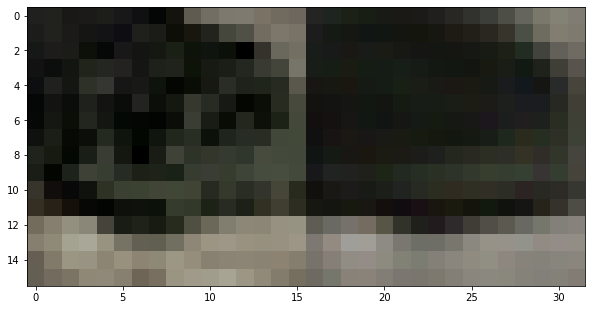

In [7]:
idx = 34
reconstructed_patch = autoencoder(torch.permute(torch.from_numpy(patches[idx]), (2, 0, 1)).unsqueeze(0))
reconstructed_patch = torch.permute(reconstructed_patch[0], (1, 2, 0))
display_imgs_side_by_side(patches[idx], reconstructed_patch.detach().numpy())

# Feature extraction

In [8]:
# Extract the patches features with the trained autoencoder
encoder = Encoder()
weights_path = 'encoder_2021-12-11_11-58-52'
X = extract_features_encoder(encoder, image_dir, weights_path)

Use GPU for features extraction.
Starting features extraction...
Features saved in output/features/features_encoder_2021-12-11_11-58-52.npy


In [9]:
X.shape

(62500, 64)

In [10]:
# Load images
imgs, gt_imgs = load_images_and_groundtruth(image_dir, gt_dir)
patches, gt_patches = get_imgs_gt_patches(imgs, gt_imgs)

y = build_gt_from_patches(gt_patches, lambda gt_patch: value_to_class(gt_patch, threshold=0.5))

X_train, y_train, X_test, y_test = split_data(X, y, ratio=0.8)

Loaded 100 images
All images have the same size !
Image size = 400, 400


In [11]:
X_train.shape, X_test.shape

((50000, 64), (12500, 64))

IndexError: index 3 is out of bounds for axis 0 with size 3

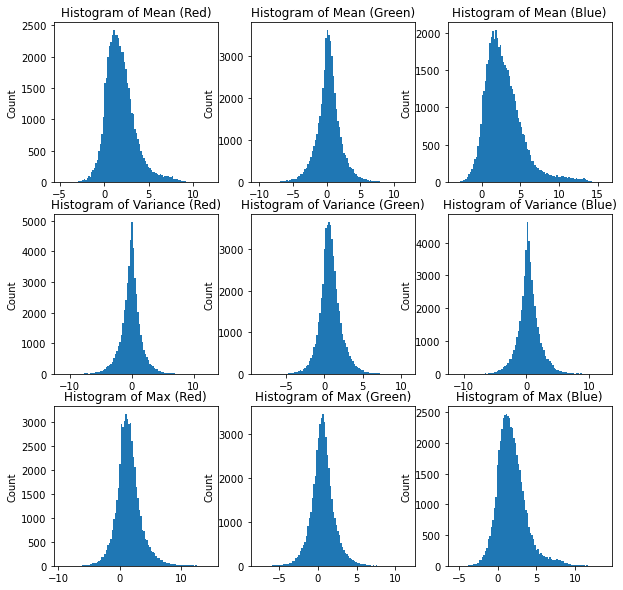

In [12]:
plot_features_distributions(X_train, save_img=True)

In [13]:
# Standardize the features
X_train, means, stds = standardize_features(X_train)

# Standardize the test data with the same statistics
X_test, _, _ = standardize_features(X_test, means=means, stds=stds)

In [14]:
log_reg = LogisticRegression(class_weight='balanced')

In [15]:
log_reg.fit(X_train, y_train)

/home/cpittet/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [36]:
y_pred = log_reg.predict(X_test)

In [16]:
svm_rbf = SVC(class_weight='balanced', kernel='rbf', cache_size=7000)

In [17]:
svm_rbf.fit(X_train, y_train)

SVC(cache_size=7000, class_weight='balanced')

In [18]:
y_pred = svm_rbf.predict(X_test)

In [19]:
_, _, _, _ = compute_scores(y_test, y_pred)

Performance on the local test set
	F1-score : 0.4938
	Recall : 0.7695
	Precision : 0.3635
	Accuracy : 0.6933


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

# Use many weak learners as Gradient boosting is
# rather robust to overfitting
# Use trees with a depth of at most 5
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5)

In [21]:
y_pred = gbc.predict(X_test)

In [22]:
_, _, _, _ = compute_scores(y_test, y_pred)

Performance on the local test set
	F1-score : 0.2279
	Recall : 0.1412
	Precision : 0.5914
	Accuracy : 0.8141
